# Compairision tables and graphs

someone can update this if they want to 

In [10]:
%matplotlib inline

In [11]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [12]:
# File to Load 
file_to_load = "Resources/fire_Final.csv"

# Read Purchasing File and store into Pandas data frame
fire_data = pd.read_csv(file_to_load)

fire_data.head()

,OBJECTID,STAT_CAUSE_DESCR,STATE,Date_Discovery,Date_Contained,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,Duration
0,1,Miscellaneous,CA,2/2/2005,2/2/2005,2005,0.10,40.036944,-121.005833,0
1,2,Lightning,CA,5/12/2004,5/12/2004,2004,0.25,38.933056,-120.404444,0
2,3,Debris Burning,CA,5/31/2004,5/31/2004,2004,0.10,38.984167,-120.735556,0
3,4,Lightning,CA,6/28/2004,7/3/2004,2004,0.10,38.559167,-119.913333,5
4,5,Lightning,CA,6/28/2004,7/3/2004,2004,0.10,38.559167,-119.933056,5


In [13]:
fire_bd = pd.DataFrame({"Total_Fires":[fire_data["OBJECTID"].nunique()],
                        "Average_Fire_Size":[fire_data["FIRE_SIZE"].mean()],
                        "Average_Duration":[fire_data["Duration"].mean()]}) 
fire_bd

,Total_Fires,Average_Fire_Size,Average_Duration
0,988934,119.268098,1.233722


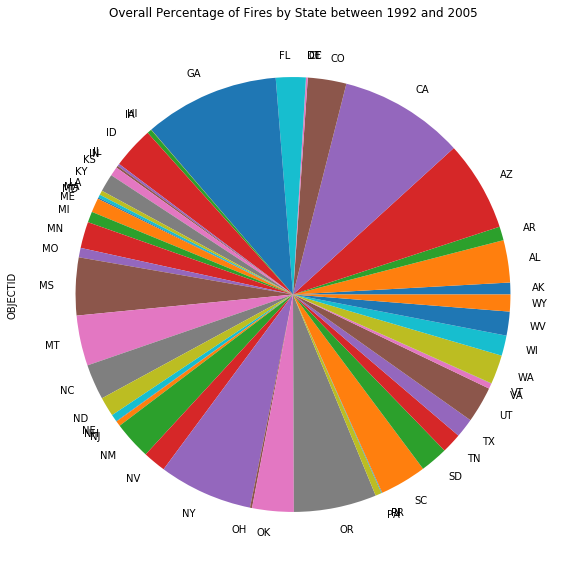

In [60]:
fire_data.groupby('STATE')["OBJECTID"].nunique().plot(kind='pie', figsize=(10,10), title = "Overall Percentage of Fires by State between 1992 and 2005",sort_columns=False)
plt.savefig('./data/total_Fires_Chart_By_State_Pie.png')

In [14]:
state_df = fire_data.groupby(["STATE"])

state_count = state_df["OBJECTID"].nunique()
state_percent = state_count/ fire_data["OBJECTID"].nunique()*100

total_fire = pd.concat([state_count.rename("Total State Count"),state_percent.rename("Total Percent")],  axis = 1)

total_fire.sort_values(["Total State Count"], ascending = False).style.format({"Total Percent":'{:.2f}%'})

,Total State Count,Total Percent
STATE,,
GA,99240,10.04%
CA,91908,9.29%
NY,68949,6.97%
AZ,66355,6.71%
OR,60751,6.14%
MS,42405,4.29%
MT,36952,3.74%
SC,34330,3.47%
AL,31058,3.14%


In [15]:
state_fire_size = state_df["FIRE_SIZE"].sum()
state_fire_size_df = pd.DataFrame(state_fire_size)
state_fire_size_df.style.format({"FIRE_SIZE":'{:,.2f}'})
state_fire_size_df.to_csv("fire_size.csv")

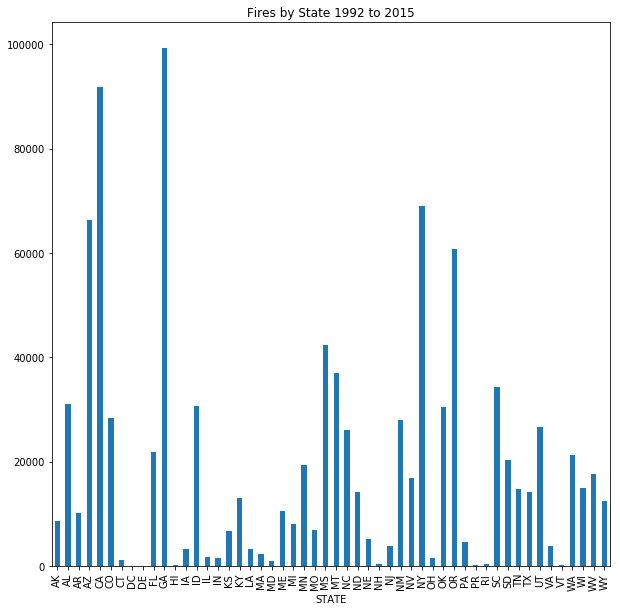

In [16]:
state_count.plot.bar(fontsize = 10, figsize=(10, 10), title = "Fires by State 1992 to 2015")
plt.savefig('./data/total_Fires_Chart_By_State.png')

In [ ]:
fire_2005.groupby('STATE')["OBJECTID"].nunique().plot(kind='pie', figsize=(10,10), title = "Percentage of Fires by State")

In [17]:
fire_2015 = fire_data[fire_data.FIRE_YEAR == 2015]

state_2015 = fire_2015.groupby(["STATE"])
count_2015 = state_2015["OBJECTID"].nunique()
percent_2015 = count_2015/ fire_2015["OBJECTID"].nunique()*100

total_2015 = pd.concat([count_2015.rename("Total State Count"),percent_2015.rename("Total Percent")], axis = 1)

total_2015.reset_index(level=0, inplace=True)
total_2015.sort_values(["STATE"]).style.format({"Total Percent":'{:.2f}%'})

,STATE,Total State Count,Total Percent
0,AK,749,1.20%
1,AL,1988,3.20%
2,AR,1265,2.03%
3,AZ,3596,5.78%
4,CA,5959,9.58%
5,CO,527,0.85%
6,CT,4,0.01%
7,DC,3,0.00%
8,DE,16,0.03%
9,FL,2523,4.06%


In [18]:
fire_1992 = fire_data[fire_data.FIRE_YEAR == 1992]

state_1992 = fire_1992.groupby(["STATE"])
count_1992 = state_1992["OBJECTID"].nunique()
percent_1992 = count_1992/ fire_1992["OBJECTID"].nunique()*100

total_1992 = pd.concat([count_1992.rename("Total State Count"),percent_1992.rename("Total Percent")], axis = 1)

total_1992.reset_index(level=0, inplace=True)
total_1992.sort_values(["Total State Count"], ascending = False).style.format({"Total Percent":'{:.2f}%'})

,STATE,Total State Count,Total Percent
9,GA,6431,14.94%
37,SC,5187,12.05%
24,MS,4461,10.36%
4,CA,4103,9.53%
35,OR,3946,9.17%
3,AZ,3465,8.05%
12,ID,1754,4.07%
25,MT,1614,3.75%
34,OK,1467,3.41%
45,WI,1284,2.98%


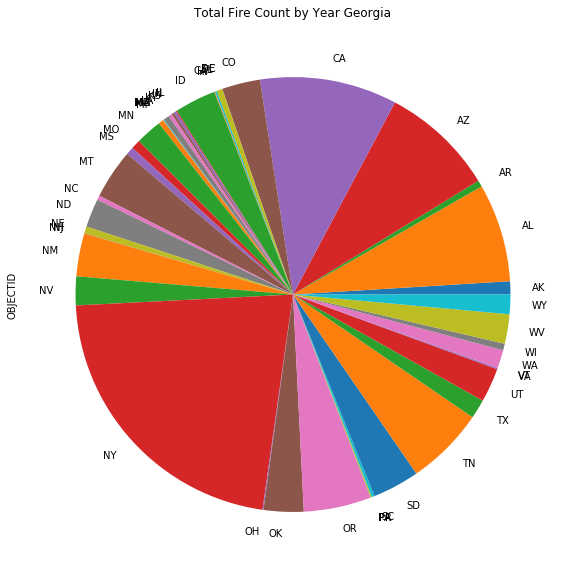

In [52]:
fire_2005 = fire_data[fire_data.FIRE_YEAR == 2005]

#state_2005 = fire_2005.groupby(["STATE"],as_index=False)
#count_2005 = state_2005["OBJECTID"].nunique()
#percent_2005 = count_2005/ fire_2005["OBJECTID"].nunique()*100
#ST_2005 =s

#total_2005 = pd.concat([,count_2005.rename("Total State Count"),percent_2005.rename("Total Percent")], axis = 1)
#total_2005

fire_2005.groupby('STATE')["OBJECTID"].nunique().plot(kind='pie', figsize=(10,10), title = "Percentage of Fires by State")

<function matplotlib.pyplot.show(*args, **kw)>

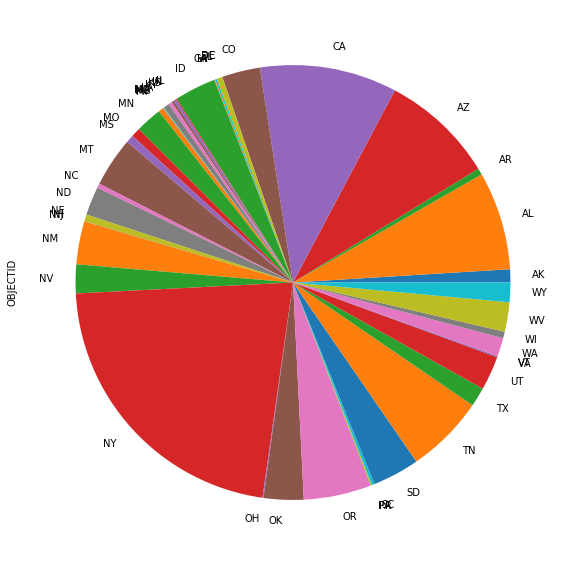

In [40]:
percent_2005.plot.pie( subplots=True, figsize=(10, 10), fontsize= 10, labeldistance=1.1)
plt.show

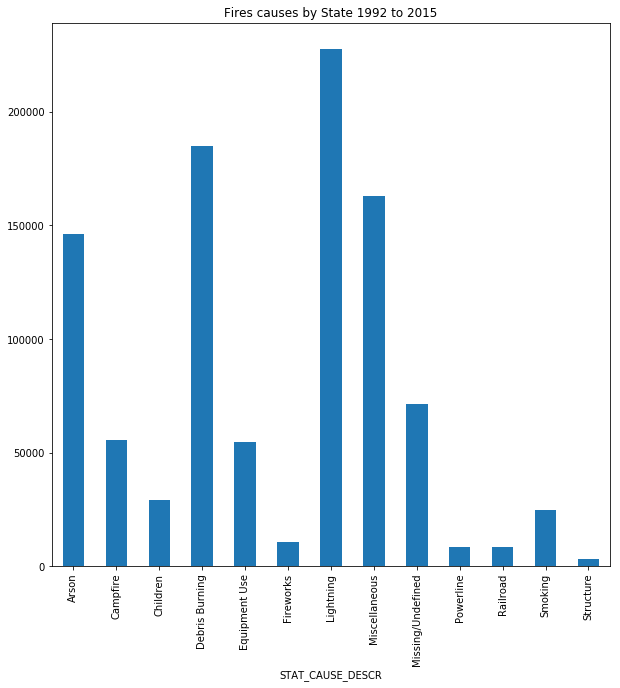

In [24]:
#fire_cause = fire_data.groupby(["STAT_CAUSE_DESCR"])
#cause = fire_cause["OBJECTID"].nunique()
#cause.index.names = ['Cause']
#cause_df = pd.DataFrame(cause.rename("Total State Count"))

cause_df.plot.bar(title = "Fires causes by State 1992 to 2015", legend=False)

fire_data.groupby('STAT_CAUSE_DESCR')["OBJECTID"].nunique().plot(kind='bar', figsize=(10,10), title = "Fires causes by State 1992 to 2015")

plt.savefig('data/Fire-Cause.png')

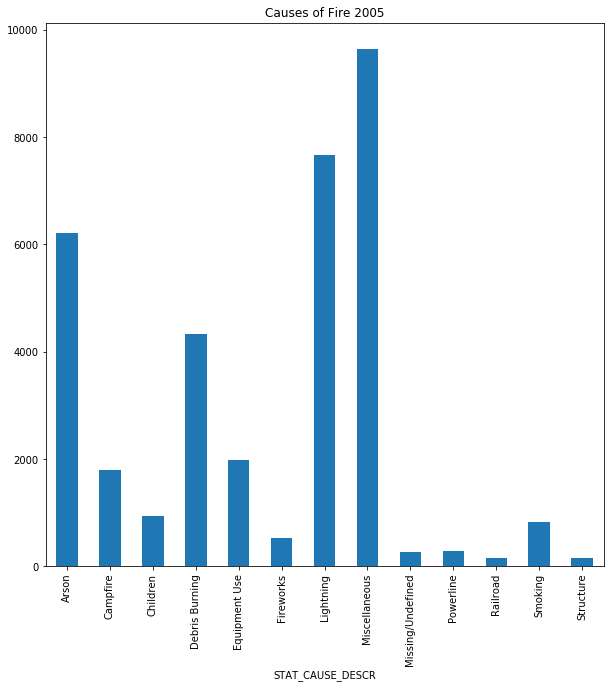

In [23]:
#fire_cause_2005 = fire_2005.groupby(["STAT_CAUSE_DESCR"])
#cause_df_2005 = fire_cause_2005["OBJECTID"].nunique()
#cause_df_2005.plot.bar(title = "Fires by State 1992 to 2015")

fire_2005.groupby('STAT_CAUSE_DESCR')["OBJECTID"].nunique().plot(kind='bar', figsize=(10,10), title = "Causes of Fire 2005")

plt.savefig('data/Fire-Cause-2005.png')

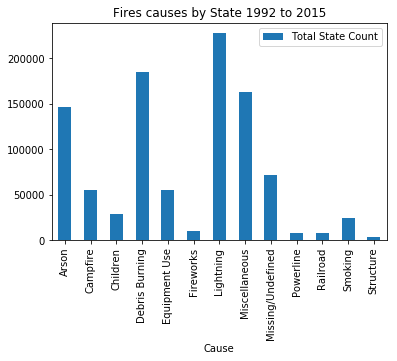

In [63]:
fire_cause = fire_data.groupby(["STAT_CAUSE_DESCR"])
cause = fire_cause["OBJECTID"].nunique()
cause.index.names = ['Cause']
cause_df = pd.DataFrame(cause.rename("Total State Count"))

cause_df.plot.bar(title = "Fires causes by State 1992 to 2015")
plt.savefig('./data/total_Fires_Chart.png')